In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset

In [3]:
df=pd.read_csv(("data/dataset.csv"))

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## Step 2: Exploratory Data Analysis (EDA)

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [7]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [8]:
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
df.shape

(43400, 12)

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [12]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# Stroke value counts

In [16]:
print(df.stroke.value_counts())

stroke
0    42617
1      783
Name: count, dtype: int64


#Check Missing Values

In [18]:
missing_values=df.isnull().sum()
print(missing_values)

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


#Handling Missing Values

In [20]:
# Safely disable new warning with the chained assignment.
pd.options.mode.chained_assignment = None
# replace missing values in variable 'bmi' with its mean
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
# remove (drop) data associated with missing values in variable 'smoking_status
clean_data=df.dropna(subset=['smoking_status'])
# drop variable 'id'
clean_data=clean_data.drop(columns=['id'])
# validate there's no more missing values
print(clean_data.isnull().sum())
print('Missing values in variable \'bmi\'\t\t:',clean_data['bmi'].isnull().sum())
print('Missing values in variable \'smoking_status\':',clean_data['smoking_status'].isnull().sum())
print("Shape of data without missing values: {}".format(clean_data.shape))



gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Missing values in variable 'bmi'		: 0
Missing values in variable 'smoking_status': 0
Shape of data without missing values: (30108, 11)


In [21]:
# Save cleaned data
clean_data.to_csv('data/clean_data.csv',index=False)

# Changing Category to Numerical Values

In [23]:
print("Unique 'gender': {}".format(clean_data['gender'].unique()))
print("Unique 'ever_married': {}".format(clean_data['ever_married'].unique()))
print("Unique 'work_type': {}".format(clean_data['work_type'].unique()))
print("Unique 'Residence_type': {}".format(clean_data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(clean_data['smoking_status'].unique()))



Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['never smoked' 'formerly smoked' 'smokes']


In [24]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(clean_data):
    from sklearn.preprocessing import LabelEncoder
    label_encoder_gender = LabelEncoder()
    label_encoder_ever_married = LabelEncoder()
    label_encoder_work_type = LabelEncoder()
    label_encoder_Residence_type = LabelEncoder()
    label_encoder_smoking_status = LabelEncoder()

    clean_data['gender']=label_encoder_gender.fit_transform(clean_data['gender'])
    clean_data['ever_married']=label_encoder_ever_married.fit_transform(clean_data['ever_married'])
    clean_data['work_type']=label_encoder_work_type.fit_transform(clean_data['work_type'])
    clean_data['Residence_type']=label_encoder_Residence_type.fit_transform(clean_data['Residence_type'])
    clean_data['smoking_status']=label_encoder_smoking_status.fit_transform(clean_data['smoking_status'])
    return clean_data

clean_data=label_encoder(clean_data)
clean_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [25]:
# Save encoded cleaned data
clean_data.to_csv('data/clean_data_encoded.csv',index=False)

# Building Model

##Class Distribution

stroke
0    29470
1      638
Name: count, dtype: int64


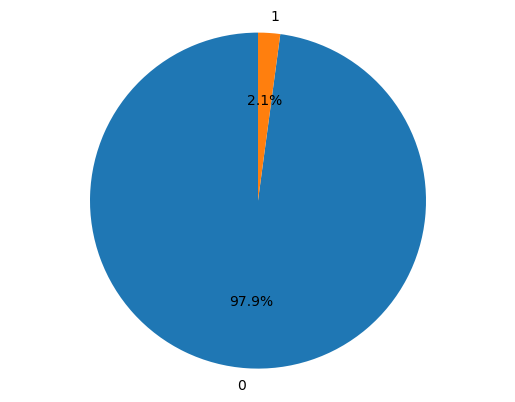

In [28]:
class_distribution=clean_data['stroke'].value_counts()
print(class_distribution)
fig,ax=plt.subplots()
ax.pie(class_distribution,labels=class_distribution.index,autopct='%1.1f%%',startangle=90)
ax.axis('equal')
plt.show()



## Split the Data, Balance the Dataset, Model Training and Prediction

In [30]:
X = clean_data.drop('stroke', axis=1)
y = clean_data['stroke']
print(y.value_counts())  # Check dataset imbalance
print(X.shape)
print(y.shape)

stroke
0    29470
1      638
Name: count, dtype: int64
(30108, 10)
(30108,)


In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
def split_train_valid_test(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

# Use original data from #3
X = clean_data.drop('stroke', axis=1)
y = clean_data['stroke']
X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X, y, test_size=0.2, random_state=42)

# Resample only the training set
adasyn = ADASYN(random_state=42, sampling_strategy='minority')
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check class distributions
_, train_count = np.unique(y_train_resampled, return_counts=True)  # Resampled training set
_, valid_count = np.unique(y_valid, return_counts=True)           # Original validation set
_, test_count = np.unique(y_test, return_counts=True)            # Original test set
print("Resampled Training Set Counts:", train_count)
print("Validation Set Counts:", valid_count)
print("Test Set Counts:", test_count)

Resampled Training Set Counts: [18860 18912]
Validation Set Counts: [4716  102]
Test Set Counts: [5894  128]


In [32]:
from imblearn.over_sampling import ADASYN
# create the  object with the desired sampling strategy.
adasyn=ADASYN(random_state=42,sampling_strategy='minority')
# fit the object to our training data
X_resampled,y_resampled=adasyn.fit_resample(clean_data.drop('stroke',axis=1),clean_data['stroke'])
print(y_resampled.value_counts())
print(X_resampled.shape)
print(y_resampled.shape)

stroke
1    29512
0    29470
Name: count, dtype: int64
(58982, 10)
(58982,)


(-1.0999999999990544,
 1.0999999999945465,
 -1.0999999999945473,
 1.0999999999997403)

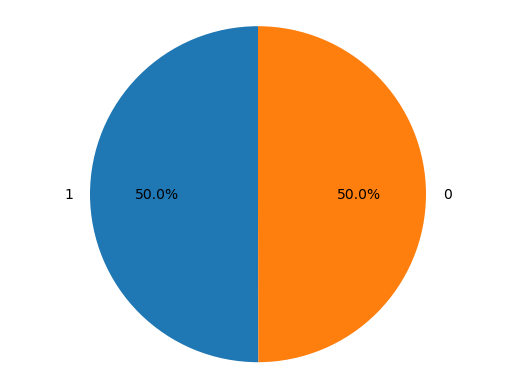

In [33]:
_class_distribution=y_resampled.value_counts()
fig,ax=plt.subplots()
ax.pie(_class_distribution,labels=_class_distribution.index,autopct='%1.1f%%',startangle=90)
ax.axis('equal')

In [34]:
# from sklearn.model_selection import train_test_split
# def split_train_valid_test(X,y,test_size=0.2,random_state=42):
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=random_state,stratify=y)
#     X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=test_size,random_state=random_state,stratify=y_train)
#     return X_train,X_valid,X_test,y_train,y_valid,y_test
# x=X_resampled
# y=y_resampled
# X_train,X_valid,X_test,y_train,y_valid,y_test=split_train_valid_test(x,y,test_size=0.2,random_state=42)
# _,train_count=np.unique(y_train,return_counts=True)
# _,valid_count=np.unique(y_valid,return_counts=True)
# _,test_count=np.unique(y_test,return_counts=True)
# # from sklearn.model_selection import train_test_split
# # def split_train_valid_test(X,y,test_size=0.2,random_state=42):
# #     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=random_state,stratify=y)
# #     X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=test_size,random_state=random_state,stratify=y_train)
# #     return X_train,X_valid,X_test,y_train,y_valid,y_test
# # x=X_resampled
# # y=y_resampled
# # X_train,X_valid,X_test,y_train,y_valid,y_test=split_train_valid_test(x,y,test_size=0.2,random_state=42)
# # _,train_count=np.unique(y_train,return_counts=True)
# # _,valid_count=np.unique(y_valid,return_counts=True)
# # _,test_count=np.unique(y_test,return_counts=True)
# # print('Train count: {}'.format(train_count))
# # print('Valid count: {}'.format(valid_count))
# # print('Test count: {}'.format(test_count))



#Data Normalisation

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#Model Training

#### Random Forest (RF)

Here’s how Random Forest did on the original test set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5894
           1       0.03      0.05      0.04       128

    accuracy                           0.94      6022
   macro avg       0.50      0.51      0.50      6022
weighted avg       0.96      0.94      0.95      6022

Confusion Matrix for Random Forest (actual vs predicted):
[[5671  223]
 [ 121    7]]


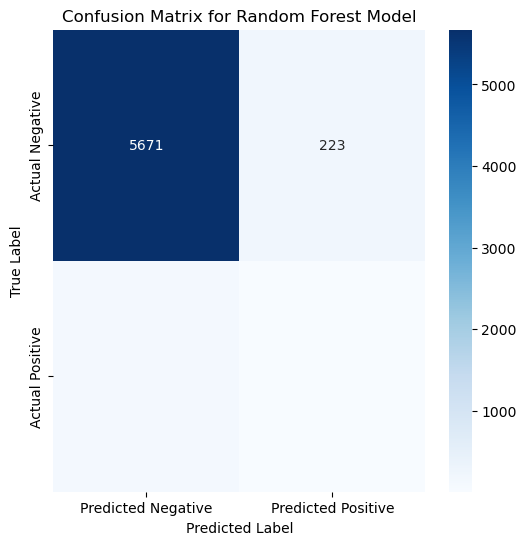

Random Forest Accuracy: 0.94
Random Forest Precision: 0.03
Random Forest Recall: 0.05
Random Forest F1 Score: 0.04
Random Forest Sensitivity: 0.05
Random Forest Specificity: 0.96
Random Forest AUC: 0.72


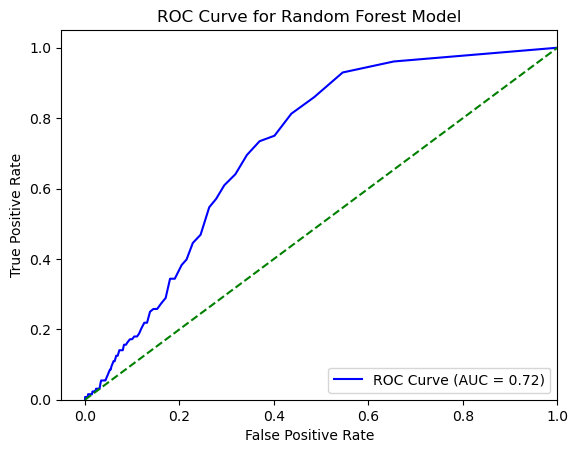

In [39]:
# Build and evaluate a Random Forest model, with a confusion matrix plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define sensitivity/specificity function
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Create and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42) # Add Hypertuned Parameters:max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators= 300
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_ranfor = rf_model.predict(X_test)
y_ranfor_prob = rf_model.predict_proba(X_test)

print("Here’s how Random Forest did on the original test set:")
print(classification_report(y_test, y_ranfor))

print("Confusion Matrix for Random Forest (actual vs predicted):")
print(confusion_matrix(y_test, y_ranfor))

# Show the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_ranfor)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy
acc_rf = accuracy_score(y_test, y_ranfor)
print(f"Random Forest Accuracy: {acc_rf:.2f}")

# Get precision, recall, and F1 score
rf_precision = precision_score(y_test, y_ranfor)
rf_recall = recall_score(y_test, y_ranfor)
rf_f1 = f1_score(y_test, y_ranfor)
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print(f"Random Forest F1 Score: {rf_f1:.2f}")

# Calculate sensitivity, specificity, and AUC
sensitivity_rf, specificity_rf = calc_sens_spec(y_test, y_ranfor)
false_pos, true_pos, _ = roc_curve(y_test, y_ranfor_prob[:, 1])
rf_auc = roc_auc_score(y_test, y_ranfor_prob[:, 1])
print(f"Random Forest Sensitivity: {sensitivity_rf:.2f}")
print(f"Random Forest Specificity: {specificity_rf:.2f}")
print(f"Random Forest AUC: {rf_auc:.2f}")

# Plot the ROC curve to see how well it separates classes
plt.figure()
plt.plot(false_pos, true_pos, color='blue', label=f'ROC Curve (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc="lower right")
plt.show()

### XGBoost (XGB)

C:\Users\Default.DESKTOP-8TCQEDR\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:36:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Here’s how XGBoost did on the original test set:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5894
           1       0.04      0.09      0.06       128

    accuracy                           0.94      6022
   macro avg       0.51      0.52      0.51      6022
weighted avg       0.96      0.94      0.95      6022

Confusion Matrix for XGBoost (actual vs predicted):
[[5624  270]
 [ 116   12]]


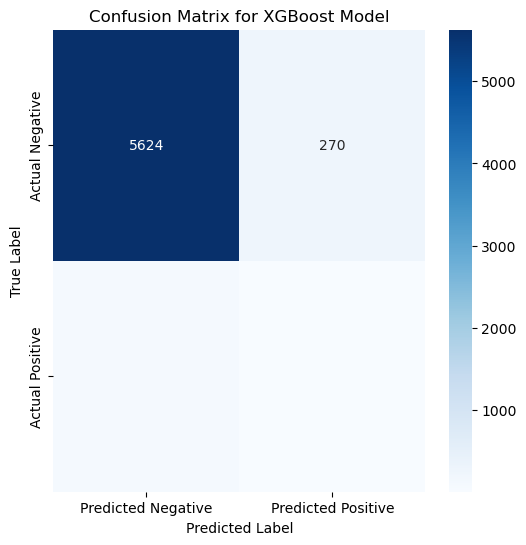

XGBoost Accuracy: 0.94
XGBoost Precision: 0.04
XGBoost Recall: 0.09
XGBoost F1 Score: 0.06
XGBoost Sensitivity: 0.09
XGBoost Specificity: 0.95
XGBoost AUC: 0.71


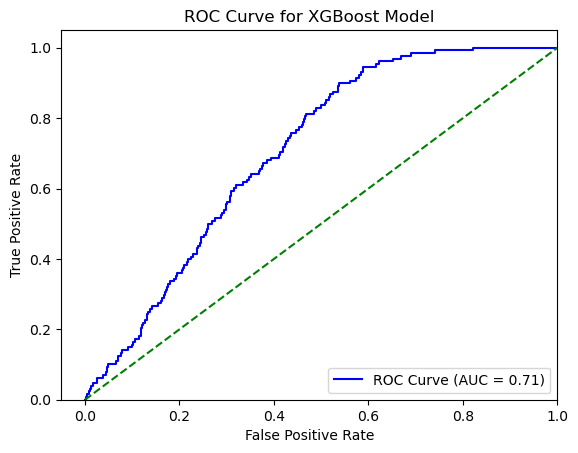

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # add hypertuned parameters: learning_rate= 0.3, max_depth= 9, n_estimators= 300, subsample= 0.8 for better accuracy
xgb_model.fit(X_train_resampled, y_train_resampled)  # Use resampled training data

# Make predictions on the original test set
y_xgb = xgb_model.predict(X_test)  # Predicted labels
y_xgb_prob = xgb_model.predict_proba(X_test)  # Probabilities for ROC/AUC

# Check how well the model did
print("Here’s how XGBoost did on the original test set:")
print(classification_report(y_test, y_xgb))

# Look at the confusion matrix (numerical version)
print("Confusion Matrix for XGBoost (actual vs predicted):")
print(confusion_matrix(y_test, y_xgb))

# Show the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for XGBoost Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy
acc_xgb = accuracy_score(y_test, y_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.2f}")

# Get precision, recall, and F1 score
xgb_precision = precision_score(y_test, y_xgb)  # How many predicted positives were correct?
xgb_recall = recall_score(y_test, y_xgb)        # How many actual positives did we find?
xgb_f1 = f1_score(y_test, y_xgb)                # A balance between precision and recall
print(f"XGBoost Precision: {xgb_precision:.2f}")
print(f"XGBoost Recall: {xgb_recall:.2f}")
print(f"XGBoost F1 Score: {xgb_f1:.2f}")

# Calculate sensitivity, specificity, and AUC
sensitivity_xgb, specificity_xgb = calc_sens_spec(y_test, y_xgb)
false_pos, true_pos, _ = roc_curve(y_test, y_xgb_prob[:, 1])
xgb_auc = roc_auc_score(y_test, y_xgb_prob[:, 1])
print(f"XGBoost Sensitivity: {sensitivity_xgb:.2f}")
print(f"XGBoost Specificity: {specificity_xgb:.2f}")
print(f"XGBoost AUC: {xgb_auc:.2f}")

# Plot the ROC curve to see how well it separates classes
plt.figure()
plt.plot(false_pos, true_pos, color='blue', label=f'ROC Curve (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')  # Random guess line
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.show()

## Performance Benchmark Across Models


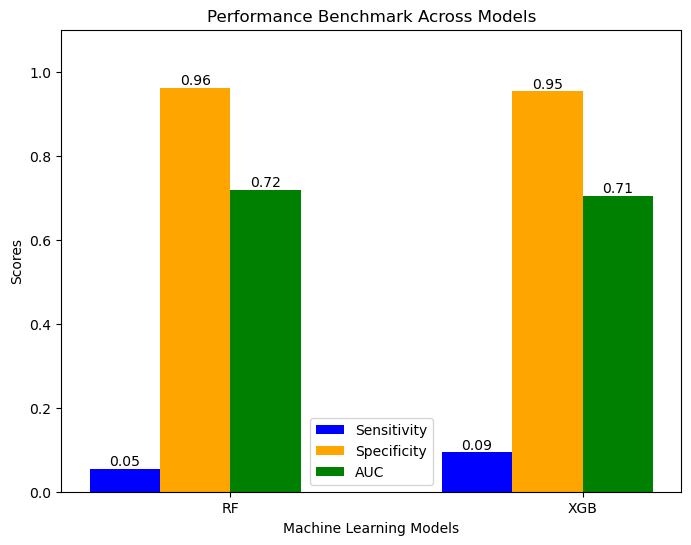

In [43]:
#8
# Performance Benchmark Across Models
import matplotlib.pyplot as plt
import numpy as np

# Use actual values from #6 and #7
ml_names = ['RF', 'XGB']
sensitivities = [sensitivity_rf, sensitivity_xgb]  # From #6 and #7
specificities = [specificity_rf, specificity_xgb]  # From #6 and #7
aucs = [rf_auc, xgb_auc]                           # From #6 and #7

# Define the autolabel function to show the height (score) above each bar
def autolabel(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2),
                 ha='center', va='bottom')

# Plot sensitivity, specificity, and AUC
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
index = np.arange(len(ml_names))

# Create bars
bar1 = ax.bar(index, sensitivities, bar_width, label='Sensitivity', color='blue')
bar2 = ax.bar(index + bar_width, specificities, bar_width, label='Specificity', color='orange')
bar3 = ax.bar(index + 2 * bar_width, aucs, bar_width, label='AUC', color='green')

# Customize the plot
ax.set_xlabel('Machine Learning Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Benchmark Across Models')
ax.set_xticks(index + bar_width * 1.5)  # Center x-ticks properly
ax.set_xticklabels(ml_names)
ax.set_ylim(0, 1.1)  # Ensure space for labels above bars
ax.legend()

# Add labels above the bars
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()

### Tree-Based Feature Importance

Random Forest Feature Ranking:
age: 0.4130
avg_glucose_level: 0.2057
bmi: 0.1445
smoking_status: 0.0582
work_type: 0.0504
Residence_type: 0.0491
gender: 0.0330
ever_married: 0.0185
hypertension: 0.0176
heart_disease: 0.0100


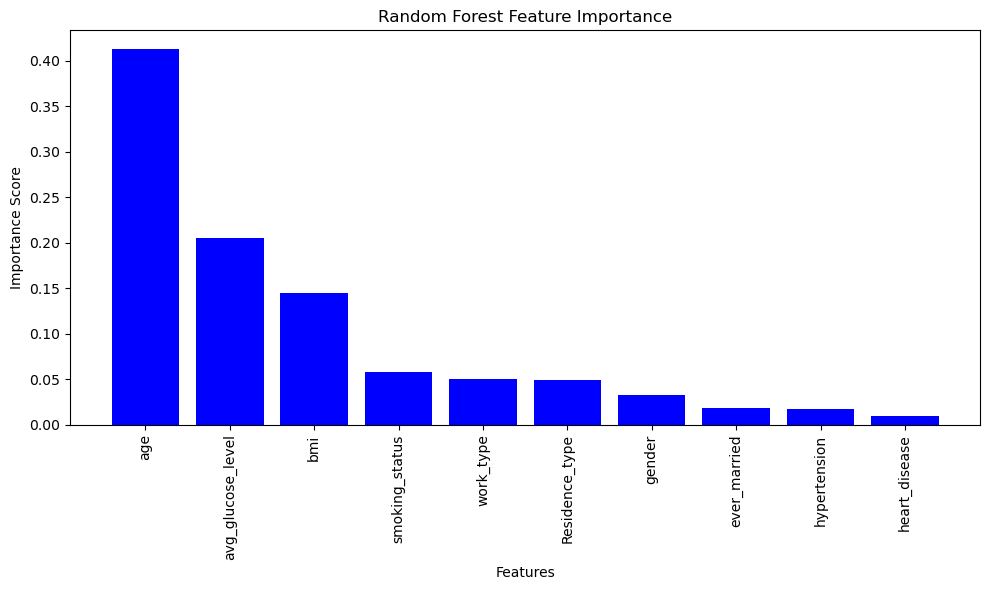

XGBoost Feature Ranking:
age: 0.1736
Residence_type: 0.1526
work_type: 0.1274
gender: 0.1221
heart_disease: 0.0895
ever_married: 0.0866
smoking_status: 0.0848
hypertension: 0.0729
avg_glucose_level: 0.0471
bmi: 0.0435


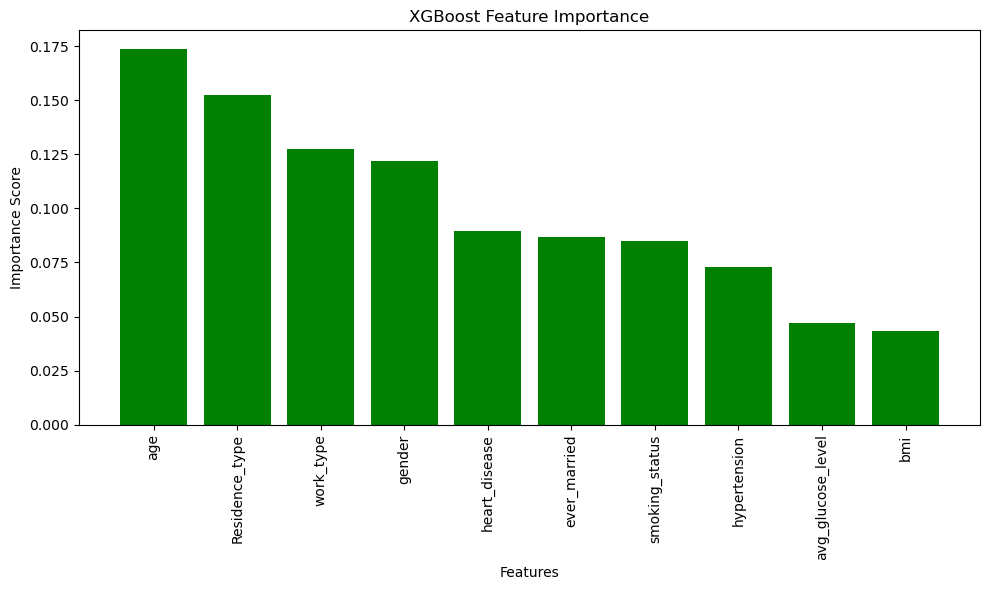

In [46]:
#9
# Tree-Based Feature Importance for Random Forest and XGBoost
import numpy as np
import matplotlib.pyplot as plt

# Feature names from the original dataset
feature_names = clean_data.drop('stroke', axis=1).columns

# Random Forest Feature Importance
rf_importances = rf_model.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]
print("Random Forest Feature Ranking:")
for i in rf_indices:
    print(f"{feature_names[i]}: {rf_importances[i]:.4f}")

# Plot RF feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_importances)), rf_importances[rf_indices], color='blue')
plt.xticks(range(len(rf_importances)), [feature_names[i] for i in rf_indices], rotation=90)
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# XGBoost Feature Importance
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]
print("XGBoost Feature Ranking:")
for i in xgb_indices:
    print(f"{feature_names[i]}: {xgb_importances[i]:.4f}")

# Plot XGB feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(xgb_importances)), xgb_importances[xgb_indices], color='green')
plt.xticks(range(len(xgb_importances)), [feature_names[i] for i in xgb_indices], rotation=90)
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

### Permutation-Based Feature Importance

Random Forest Permutation Importance:
age: 0.2064 ± 0.0222
avg_glucose_level: 0.0214 ± 0.0069
bmi: 0.0037 ± 0.0106
gender: -0.0010 ± 0.0045
ever_married: -0.0028 ± 0.0045
heart_disease: -0.0051 ± 0.0032
Residence_type: -0.0074 ± 0.0088
hypertension: -0.0110 ± 0.0038
smoking_status: -0.0136 ± 0.0068
work_type: -0.0171 ± 0.0047


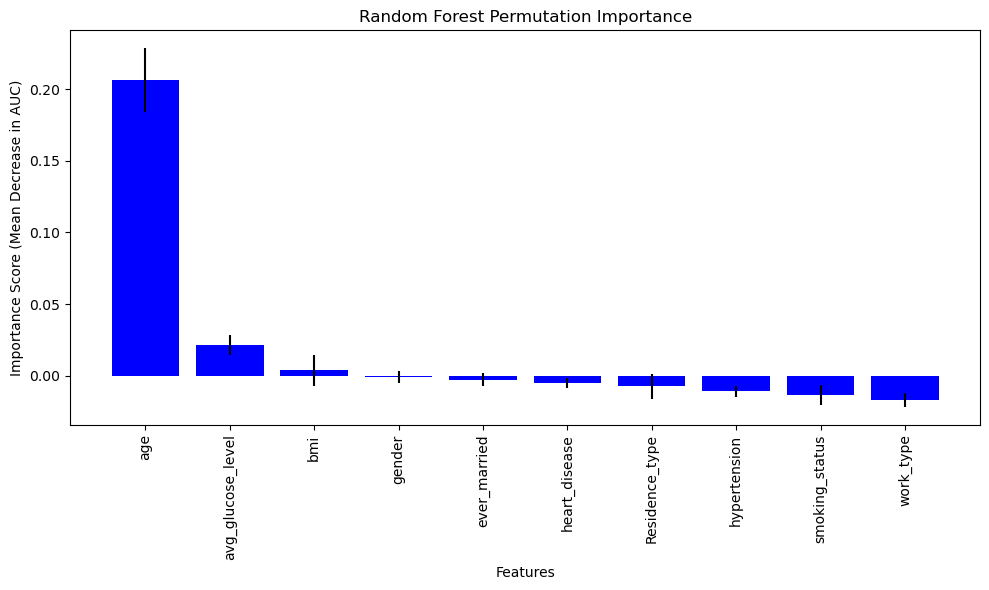

XGBoost Permutation Importance:
age: 0.2304 ± 0.0184
bmi: 0.0285 ± 0.0093
avg_glucose_level: 0.0216 ± 0.0087
smoking_status: 0.0103 ± 0.0041
gender: 0.0052 ± 0.0028
Residence_type: -0.0025 ± 0.0050
ever_married: -0.0027 ± 0.0027
work_type: -0.0091 ± 0.0056
hypertension: -0.0106 ± 0.0033
heart_disease: -0.0204 ± 0.0043


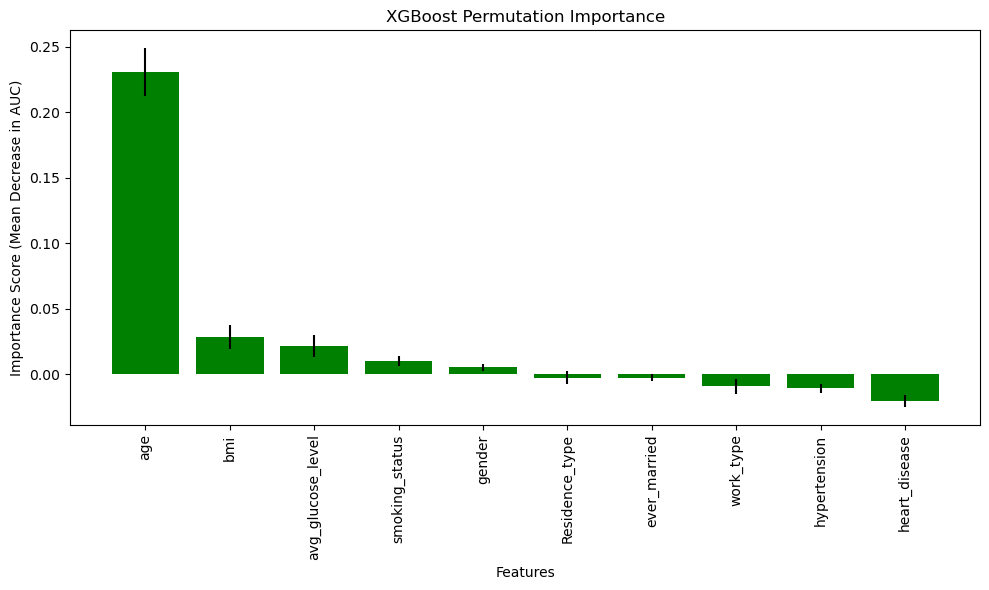

In [48]:
#10
# Permutation-Based Feature Importance for Random Forest and XGBoost
from sklearn.inspection import permutation_importance

# Random Forest Permutation Importance
rf_perm = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')
rf_perm_indices = np.argsort(rf_perm.importances_mean)[::-1]
print("Random Forest Permutation Importance:")
for i in rf_perm_indices:
    print(f"{feature_names[i]}: {rf_perm.importances_mean[i]:.4f} ± {rf_perm.importances_std[i]:.4f}")

# Plot RF permutation importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_perm.importances_mean)), rf_perm.importances_mean[rf_perm_indices],
        yerr=rf_perm.importances_std[rf_perm_indices], color='blue')
plt.xticks(range(len(rf_perm.importances_mean)), [feature_names[i] for i in rf_perm_indices], rotation=90)
plt.title('Random Forest Permutation Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score (Mean Decrease in AUC)')
plt.tight_layout()
plt.show()

# XGBoost Permutation Importance
xgb_perm = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')
xgb_perm_indices = np.argsort(xgb_perm.importances_mean)[::-1]
print("XGBoost Permutation Importance:")
for i in xgb_perm_indices:
    print(f"{feature_names[i]}: {xgb_perm.importances_mean[i]:.4f} ± {xgb_perm.importances_std[i]:.4f}")

# Plot XGB permutation importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(xgb_perm.importances_mean)), xgb_perm.importances_mean[xgb_perm_indices],
        yerr=xgb_perm.importances_std[xgb_perm_indices], color='green')
plt.xticks(range(len(xgb_perm.importances_mean)), [feature_names[i] for i in xgb_perm_indices], rotation=90)
plt.title('XGBoost Permutation Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score (Mean Decrease in AUC)')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [51]:
#12
# Hyperparameter Tuning for Random Forest and XGBoost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# --- Random Forest Hyperparameter Tuning ---
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [10, 20, None],            # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples at a leaf node
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,                                   # 5-fold cross-validation
    scoring='roc_auc',                      # Optimize for AUC
    n_jobs=-1,                              # Use all available CPU cores
    verbose=1
)

# Fit Grid Search on resampled training data
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest CV AUC:", rf_grid_search.best_score_)

# Update rf_model with best parameters and evaluate on test set
rf_model_optimized = rf_grid_search.best_estimator_
rf_y_pred = rf_model_optimized.predict(X_test)
rf_y_pred_proba = rf_model_optimized.predict_proba(X_test)[:, 1]
rf_test_auc = roc_auc_score(y_test, rf_y_pred_proba)
print("Optimized Random Forest Test AUC:", rf_test_auc)

# --- XGBoost Hyperparameter Tuning ---
# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'max_depth': [3, 6, 9],                 # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.3],      # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0]           # Fraction of samples used per tree
}

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform Grid Search with 5-fold cross-validation
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=5,                                   # 5-fold cross-validation
    scoring='roc_auc',                      # Optimize for AUC
    n_jobs=-1,                              # Use all available CPU cores
    verbose=1
)

# Fit Grid Search on resampled training data
xgb_grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print("Best XGBoost Parameters:", xgb_grid_search.best_params_)
print("Best XGBoost CV AUC:", xgb_grid_search.best_score_)

# Update xgb_model with best parameters and evaluate on test set
xgb_model_optimized = xgb_grid_search.best_estimator_
xgb_y_pred = xgb_model_optimized.predict(X_test)
xgb_y_pred_proba = xgb_model_optimized.predict_proba(X_test)[:, 1]
xgb_test_auc = roc_auc_score(y_test, xgb_y_pred_proba)
print("Optimized XGBoost Test AUC:", xgb_test_auc)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest CV AUC: 0.9745850526721505
Optimized Random Forest Test AUC: 0.7223096316168985
Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\Default.DESKTOP-8TCQEDR\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:09:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Parameters: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
Best XGBoost CV AUC: 0.9874385502107458
Optimized XGBoost Test AUC: 0.7152321216491349


##Hypertuned Randomforest Classifier

After Hypertuning RF report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5894
           1       0.03      0.05      0.03       128

    accuracy                           0.94      6022
   macro avg       0.50      0.50      0.50      6022
weighted avg       0.96      0.94      0.95      6022

Confusion Matrix for Random Forest (actual vs predicted):
[[5667  227]
 [ 122    6]]


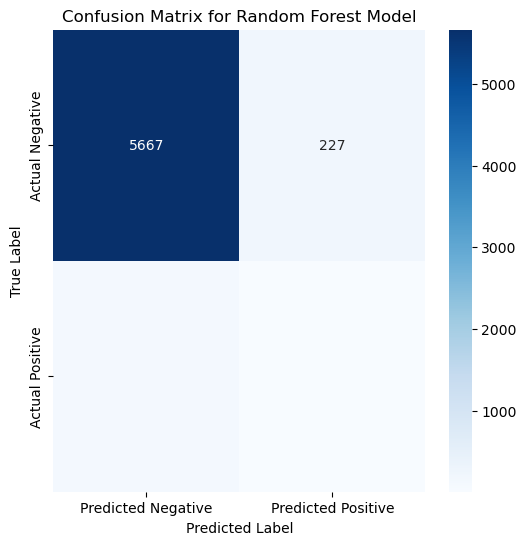

Random Forest Accuracy: 0.94
Random Forest Precision: 0.03
Random Forest Recall: 0.05
Random Forest F1 Score: 0.03
Random Forest Sensitivity: 0.05
Random Forest Specificity: 0.96
Random Forest AUC: 0.72


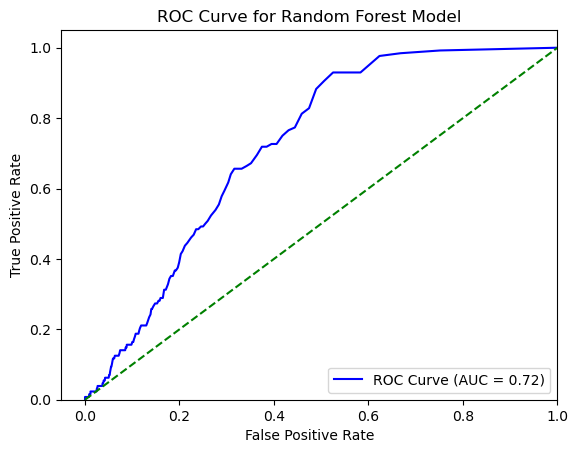

In [98]:
# Build and evaluate a Random Forest model, with a confusion matrix plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define sensitivity/specificity function
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Create and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42,max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators= 300)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_ranfor = rf_model.predict(X_test)
y_ranfor_prob = rf_model.predict_proba(X_test)

print("After Hypertuning RF report:")
print(classification_report(y_test, y_ranfor))

print("Confusion Matrix for Random Forest (actual vs predicted):")
print(confusion_matrix(y_test, y_ranfor))

# Show the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_ranfor)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy
acc_rf = accuracy_score(y_test, y_ranfor)
print(f"Random Forest Accuracy: {acc_rf:.2f}")

# Get precision, recall, and F1 score
rf_precision = precision_score(y_test, y_ranfor)
rf_recall = recall_score(y_test, y_ranfor)
rf_f1 = f1_score(y_test, y_ranfor)
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print(f"Random Forest F1 Score: {rf_f1:.2f}")

# Calculate sensitivity, specificity, and AUC
sensitivity_rf, specificity_rf = calc_sens_spec(y_test, y_ranfor)
false_pos, true_pos, _ = roc_curve(y_test, y_ranfor_prob[:, 1])
rf_auc = roc_auc_score(y_test, y_ranfor_prob[:, 1])
print(f"Random Forest Sensitivity: {sensitivity_rf:.2f}")
print(f"Random Forest Specificity: {specificity_rf:.2f}")
print(f"Random Forest AUC: {rf_auc:.2f}")

# Plot the ROC curve to see how well it separates classes
plt.figure()
plt.plot(false_pos, true_pos, color='blue', label=f'ROC Curve (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc="lower right")
plt.show()

##Hypertuned XGBoost Model

C:\Users\Default.DESKTOP-8TCQEDR\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:57:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


After Hyperparameter tuning xgb report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5894
           1       0.02      0.02      0.02       128

    accuracy                           0.96      6022
   macro avg       0.50      0.50      0.50      6022
weighted avg       0.96      0.96      0.96      6022

Confusion Matrix for XGBoost (actual vs predicted):
[[5750  144]
 [ 125    3]]


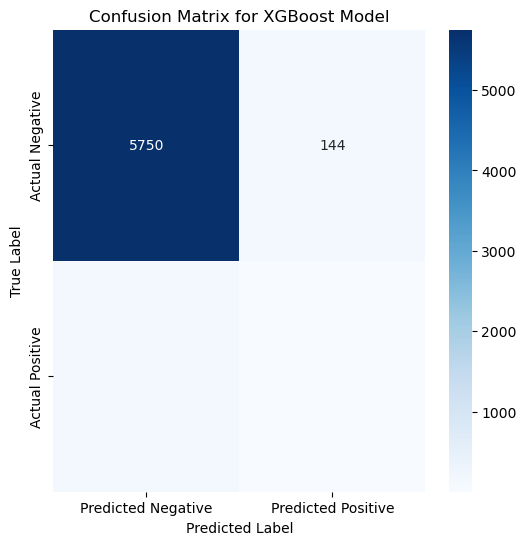

XGBoost Accuracy: 0.96
XGBoost Precision: 0.02
XGBoost Recall: 0.02
XGBoost F1 Score: 0.02
XGBoost Sensitivity: 0.02
XGBoost Specificity: 0.98
XGBoost AUC: 0.72


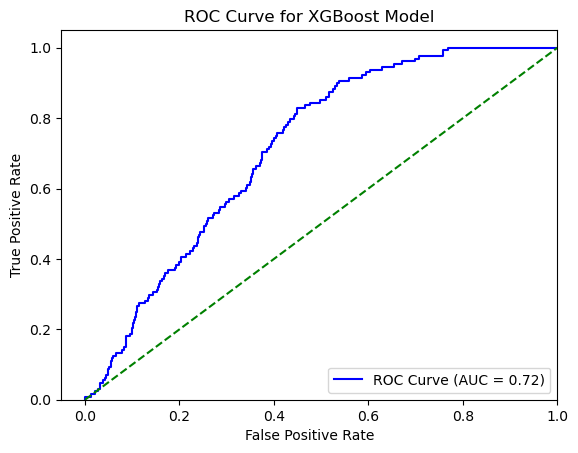

In [99]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',learning_rate= 0.3, max_depth= 9, n_estimators= 300, subsample= 0.8) # add hypertuned parameters: learning_rate= 0.3, max_depth= 9, n_estimators= 300, subsample= 0.8 for better accuracy
xgb_model.fit(X_train_resampled, y_train_resampled)  # Use resampled training data

# Make predictions on the original test set
y_xgb = xgb_model.predict(X_test)  # Predicted labels
y_xgb_prob = xgb_model.predict_proba(X_test)  # Probabilities for ROC/AUC

# Check how well the model did
print("After Hyperparameter tuning xgb report:")
print(classification_report(y_test, y_xgb))

# Look at the confusion matrix (numerical version)
print("Confusion Matrix for XGBoost (actual vs predicted):")
print(confusion_matrix(y_test, y_xgb))

# Show the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for XGBoost Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy
acc_xgb = accuracy_score(y_test, y_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.2f}")

# Get precision, recall, and F1 score
xgb_precision = precision_score(y_test, y_xgb)  # How many predicted positives were correct?
xgb_recall = recall_score(y_test, y_xgb)        # How many actual positives did we find?
xgb_f1 = f1_score(y_test, y_xgb)                # A balance between precision and recall
print(f"XGBoost Precision: {xgb_precision:.2f}")
print(f"XGBoost Recall: {xgb_recall:.2f}")
print(f"XGBoost F1 Score: {xgb_f1:.2f}")

# Calculate sensitivity, specificity, and AUC
sensitivity_xgb, specificity_xgb = calc_sens_spec(y_test, y_xgb)
false_pos, true_pos, _ = roc_curve(y_test, y_xgb_prob[:, 1])
xgb_auc = roc_auc_score(y_test, y_xgb_prob[:, 1])
print(f"XGBoost Sensitivity: {sensitivity_xgb:.2f}")
print(f"XGBoost Specificity: {specificity_xgb:.2f}")
print(f"XGBoost AUC: {xgb_auc:.2f}")

# Plot the ROC curve to see how well it separates classes
plt.figure()
plt.plot(false_pos, true_pos, color='blue', label=f'ROC Curve (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')  # Random guess line
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.show()

## Performance Benchmark Across Hypertuned Model

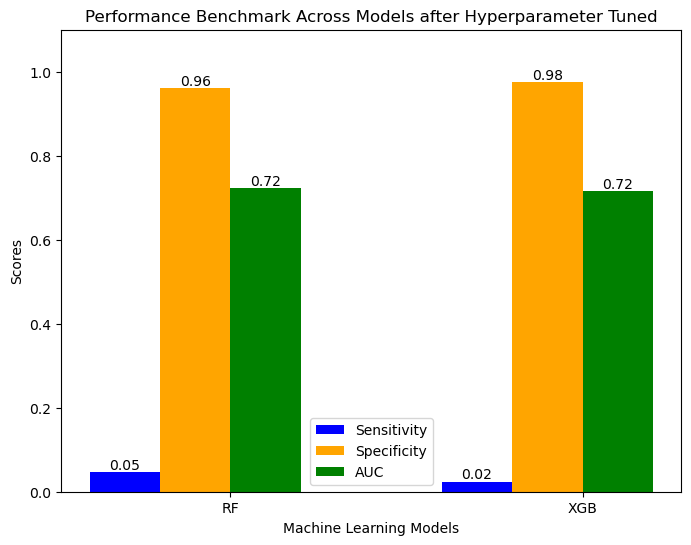

In [94]:
# Performance Benchmark Across Models
import matplotlib.pyplot as plt
import numpy as np

# Use actual values from #6 and #7
ml_names = ['RF', 'XGB']
sensitivities = [sensitivity_rf, sensitivity_xgb]  # From #6 and #7
specificities = [specificity_rf, specificity_xgb]  # From #6 and #7
aucs = [rf_auc, xgb_auc]                           # From #6 and #7

# Define the autolabel function to show the height (score) above each bar
def autolabel(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2),
                 ha='center', va='bottom')

# Plot sensitivity, specificity, and AUC
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
index = np.arange(len(ml_names))

# Create bars
bar1 = ax.bar(index, sensitivities, bar_width, label='Sensitivity', color='blue')
bar2 = ax.bar(index + bar_width, specificities, bar_width, label='Specificity', color='orange')
bar3 = ax.bar(index + 2 * bar_width, aucs, bar_width, label='AUC', color='green')

# Customize the plot
ax.set_xlabel('Machine Learning Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Benchmark Across Models after Hyperparameter Tuned')
ax.set_xticks(index + bar_width * 1.5)  # Center x-ticks properly
ax.set_xticklabels(ml_names)
ax.set_ylim(0, 1.1)  # Ensure space for labels above bars
ax.legend()

# Add labels above the bars
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()